In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import sys
sys.path.append('/Users/jonathanquartin/Documents/Coding/GitHub/precip-notebooks/Notebook Functions')
sys.path.append('/Users/jonathanquartin/Documents/Coding/GitHub/precip-notebooks/Global Functions')
from helper_functions import regressor, scatter_compare, data_cleaner, date_to_decimal_year, volcano_rain_frame, data_cleaner

In [2]:
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/precip-notebooks/GALAPAGOS_DATA'

In [3]:
# Import tables
rainfall = pd.read_csv(os.path.join(folder_path, "update_2024.csv"))
#rainfall = pd.read_csv(os.path.join(folder_path, "isabela_2024.csv"))

bellavista = pd.read_csv(os.path.join(folder_path, "climate_bellavista.csv"))
ayora = pd.read_csv(os.path.join(folder_path, "ayora_2024.csv"))

In [4]:
# Uncomment to use Ayora
sites_dict = {'Ayora': (-90.35, -.75, 'Ayora'), 'Wolf': (-91.35, .05, 'Wolf'), 'Fernandina': (-91.45, -.45, 'Fernandina'), 'Negra, Sierra': (-91.15, -.85, 'Sierra Negra'), 'Azul, Cerro': (-91.25, -.55, 'Cerro Azul')} # Long/lat pairs must exist in rainfall data
gauges_dict = {'Ayora': (-90.35, -.75, 'Ayora')}

# Uncomment to use Bellavista
# sites_dict = {'Bellavista': (-90.35, -.65, 'Bellavista'), 'Wolf': (-91.35, .05, 'Wolf'), 'Fernandina': (-91.45, -.45, 'Fernandina'), 'Negra, Sierra': (-91.15, -.85, 'Sierra Negra'), 'Azul, Cerro': (-91.25, -.55, 'Cerro Azul')} # Long/lat pairs must exist in rainfall data
# gauges_dict = {'Bellavista': (-90.35, -.65, 'Bellavista')}

compare_site = ayora  # Choose a gauge site to compare to (currently either ayora or bellavista)
site_name = 'Ayora' # Same choice as for compare_site, but as a string and capitalized
rolling_number = 90 # Number of days to average rainfall over
print_summary = True # Make true if you want to see summary of regression

                            OLS Regression Results                            
Dep. Variable:                   roll   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                 1.290e+04
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:19:17   Log-Likelihood:                -43774.
No. Observations:                8583   AIC:                         8.755e+04
Df Residuals:                    8581   BIC:                         8.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7073      0.549     -4.931      0.0

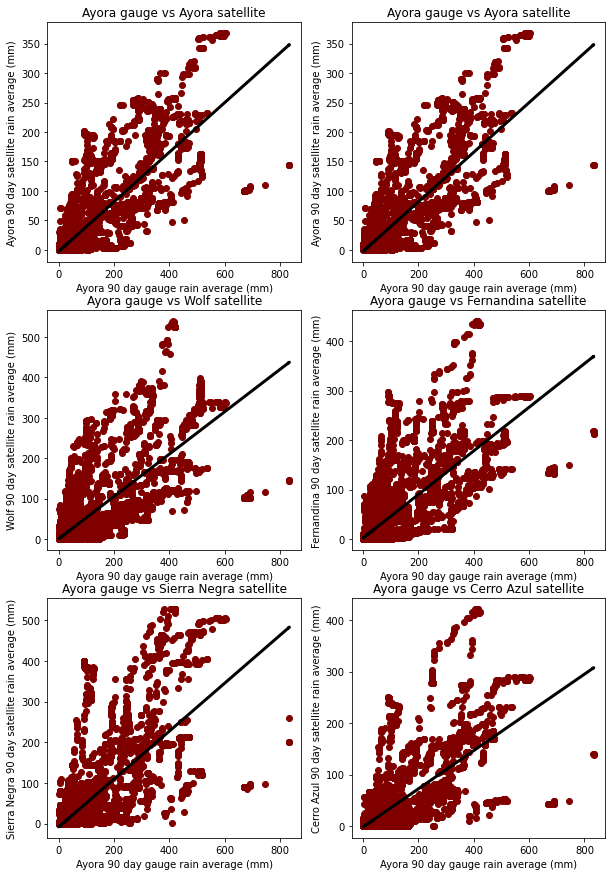

In [5]:
compare_frame = data_cleaner(compare_site, rolling_number)
scatter_compare(rainfall, sites_dict, gauges_dict, compare_frame, site_name, rolling_number)